In [1]:
##Code for the statistics module in Python for MSc in Data Science
##Requires the csv's titanic.csv and munichrent.csv

In [2]:
#Scipy
from scipy import stats

In [4]:
#Create an object representing the N (0,1) distribution using the below
n1 = stats.norm(0,1)

In [5]:
#Evaluate the cdf at 0 using 
print(n1.cdf(0))

0.5


In [6]:
##You can also use the below 
stats.norm.cdf(0, loc=0, scale=1)

0.5

In [7]:
##Example 1: focus on exponential distribution 
from scipy import stats
theta = 4 
expo4 = stats.expon(scale=1/theta)

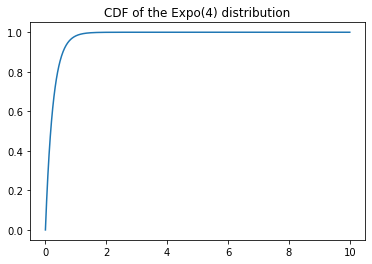

In [11]:
#Create a plot of the c.d.f using 
import numpy as np 
import matplotlib.pyplot as plt 
x = np.linspace(0, 10, 1000)
plt.plot(x, expo4.cdf(x))
plt.title("CDF of the Expo(4) distribution")
plt.show()

In [12]:
##Draw a sample size of 1,000 from this distribution, check the mean of the distribution
x = expo4.rvs(size=1000)
print(x.mean())

0.2581239453779659


In [13]:
##Using the fit method, find the maximum likelihood estimate of the parameter(s) using the sample. 
##The estimate of the scale parameter should be similar to the scale parameter used to simulate the data
print(stats.expon.fit(x))

(0.0001535792564474748, 0.2579703661215184)


In [15]:
##Defining your own distribution in SciPy
from scipy import stats 
class toydist_gen(stats.rv_continuous):
    def _cdf(self, x):
        return np.where(x <0, 0, np.where(x<1, 3*x**2-2*x**3, 1))

In [16]:
##Translate this into a proper model class
toydist = toydist_gen()

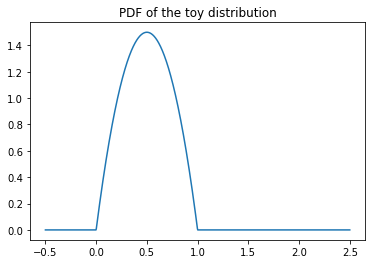

In [18]:
#Create visual of the probability density function (PDF)
import numpy as np 
import matplotlib.pyplot as plt 
x = np.linspace(-0.5, 2.5, 1000)
plt.plot(x, toydist().pdf(x))
plt.title("PDF of the toy distribution")
plt.show()

In [19]:
##Compute the mean of the above 
print(toydist.mean())

0.49999999999999983


In [20]:
#Variance 
print(toydist.var())

0.04999999998859683


In [22]:
##And the 90% quintile 
print(toydist.ppf(0.9))

0.8041998943409082


In [23]:
##Draw a random sample from toydist
x = toydist.rvs(size=50)

In [24]:
##Estiomate a location and scale parameter from the sample using fit method
print(toydist.fit(x))

(-0.03535849524545119, 1.0355319748475087)


In [25]:
##Functions for statistical tests in SciPy
##ttest_1samp: Compare mean of Gaussian(ish) sample to given value 
##ttest_ind: Compare means of two Gaussian(ish) samples
##wilcoxon: Compare median of symmetric distribution to zero (nonparametric)
##mannwhitneyu: Compare medians of two samples from symmetric distributions (nonparametric)
##ks_2samp: compare distributions of two samples
##chisquare: compare discrete distribution to given distribution 
##chi2_contingency: Check independence between two discrete variables

In [26]:
##Titanic passengers t-test 
import pandas as pd 
titanic = pd.read_csv("titanic.csv")

In [27]:
##drop instances with na's
titanic = titanic.dropna()

In [28]:
print(titanic.head())

   survived                                             name     sex      age  \
0         1                    Allen, Miss. Elisabeth Walton  female  29.0000   
1         1                   Allison, Master. Hudson Trevor    male   0.9167   
2         0                     Allison, Miss. Helen Loraine  female   2.0000   
3         0             Allison, Mr. Hudson Joshua Creighton    male  30.0000   
4         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000   

       fare pclass  
0  211.3375  first  
1  151.5500  first  
2  151.5500  first  
3  151.5500  first  
4  151.5500  first  


In [29]:
##In this example, we will look at whether the average of of those that survived is different to those
##that didnt survive
survived = titanic.query("survived==1")["age"]
not_survived = titanic.query("survived==0")["age"]

In [30]:
##Print the means of survived/not survived
import numpy as np
print(np.mean(survived))
print(np.mean(not_survived))

28.918228103044495
30.49689854368932


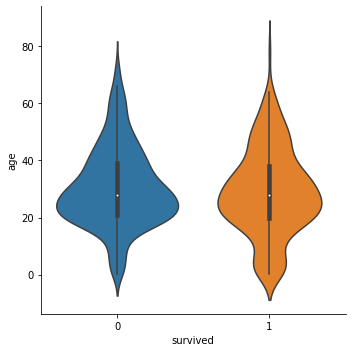

In [32]:
##Create a violin plot of the distribution of ages for each group
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="survived", y="age", data=titanic, kind="violin")
plt.show()

In [33]:
##To determine whether the difference is significant, we can use the ttest function in SciPy
from scipy import stats
print(stats.ttest_ind(survived, not_survived))

Ttest_indResult(statistic=-1.7451383751048262, pvalue=0.08125528254927918)


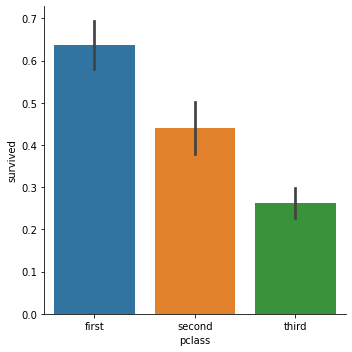

In [34]:
##For the next exapmple, we will look at whether the passenger class had an impact on survival
import seaborn as sns 
import matplotlib.pyplot as plt
sns.catplot(x="pclass", y="survived", data=titanic, kind="bar")
plt.show()

In [35]:
##In order to carry out a statistical test for class, we need to create a cross tab
c = pd.crosstab(titanic["survived"], titanic["pclass"])
print(c)

pclass    first  second  third
survived                      
0           103     146    369
1           181     115    131


In [36]:
##We can now carry out a test of independance
print(stats.chi2_contingency(c))

(107.05897138923328, 5.6550928992503396e-24, 2, array([[167.95406699, 154.35215311, 295.6937799 ],
       [116.04593301, 106.64784689, 204.3062201 ]]))


In [37]:
##Kernal density estimation
##Draw a random sample from the distribution using
from scipy import stats
chi6 = stats.chi2(df=6)
x = chi6.rvs(size=100)

In [38]:
##Estimate its density using
kde = stats.gaussian_kde(x)

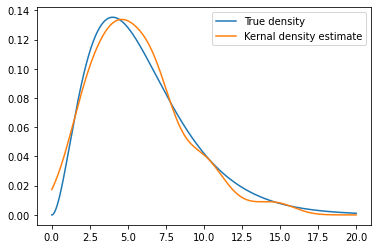

In [39]:
##kde is now a function that takes as input a point (or an array of points) at which to evaluate 
##the estimate of the density
##Plot the kernal density estimate along with the true density with the below
import numpy as np
import matplotlib.pyplot as plt
x0 = np.linspace(0, 20, 1000)
plt.plot(x0, chi6.pdf(x0), label="True density")
plt.plot(x0, kde(x0), label="Kernal density estimate")
plt.legend()
plt.show()

In [41]:
##using statsmodel with titanic dataset to perform a t-test
import pandas as pd
import statsmodels.api as sm
titanic = pd.read_csv("titanic.csv")
titanic = titanic.dropna()
survived = titanic.query("survived==1")["age"]
not_survived = titanic.query("survived==0")["age"]
print(sm.stats.ttest_ind(survived, not_survived))

(-1.7451383751048262, 0.08125528254927918, 1043.0)


In [42]:
##Fitting a linear regression model using statsmodels to munich rent data
import pandas as pd
munichrent = pd.read_csv("munichrent.csv")
print(munichrent.head())

         rent   rentsqm  area   yearc location      bath   kitchen cheating  \
0  109.948715  4.228797    26  1918.0     good  standard  standard       no   
1  243.282043  8.688646    28  1918.0     good  standard  standard      yes   
2  261.641022  8.721369    30  1918.0  average  standard  standard      yes   
3  106.410255  3.547009    30  1918.0     good  standard  standard       no   
4  133.384613  4.446154    30  1918.0     good  standard  standard      yes   

   district  
0       916  
1       813  
2       611  
3      2025  
4       561  


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

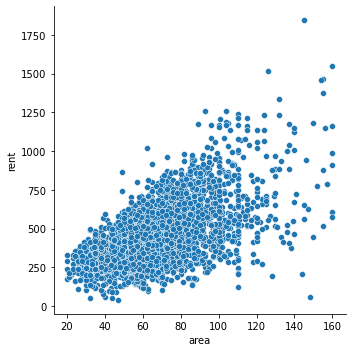

In [43]:
##Plot the rent againts the area of munichrent 
import seaborn as sns
import matplotlib.pyplot as plt
sns.relplot("area", "rent", data=munichrent)
plt.show

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


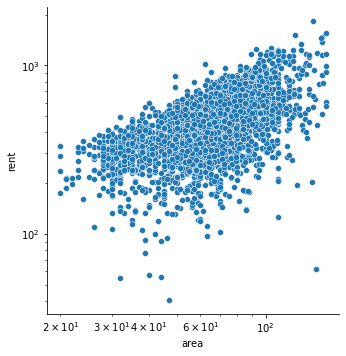

In [44]:
##Model the data on a log scale
sns.relplot("area", "rent", data=munichrent)
plt.xscale("log")
plt.yscale("log")
plt.show()

In [45]:
##In order to fit a regression model of the form log(rent) = B0 + B1 log(area) + Ei
#We need to construct the matrix X
import numpy as np
n = munichrent.shape[0]
X = np.stack((np.ones(n), np.log(munichrent["area"])), axis=1)
y = np.log(munichrent["rent"])

In [46]:
#We can now fit the linear regression model
import statsmodels.api as sm 
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     1349.
Date:                Mon, 27 Dec 2021   Prob (F-statistic):          3.03e-245
Time:                        12:48:06   Log-Likelihood:                -1194.3
No. Observations:                3082   AIC:                             2393.
Df Residuals:                    3080   BIC:                             2405.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3722      0.073     46.204      0.0

In [49]:
##You can fit the example above using simpler code
import statsmodels.formula.api as smf
import numpy as np
model = smf.ols("np.log(rent) ~ np.log(area)", data=munichrent)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(rent)   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     1349.
Date:                Mon, 27 Dec 2021   Prob (F-statistic):          3.03e-245
Time:                        12:51:36   Log-Likelihood:                -1194.3
No. Observations:                3082   AIC:                             2393.
Df Residuals:                    3080   BIC:                             2405.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.3722      0.073     46.204   

In [50]:
##If you want to include other factors, you can use the code below 
model = smf.ols("rentsqm ~ location + area + kitchen + bath + cheating + yearc", 
               data = munichrent)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                rentsqm   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     194.1
Date:                Mon, 27 Dec 2021   Prob (F-statistic):          6.97e-239
Time:                        12:53:12   Log-Likelihood:                -6552.7
No. Observations:                3082   AIC:                         1.312e+04
Df Residuals:                    3074   BIC:                         1.317e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -43.5758    

In [51]:
##Predictions 
##We can predict the rent per square meter for two hypothetical apartments using the previous model
##First define the covariates for the two new observations as a data frame 
munichrent_new = pd.DataFrame({"area": [90, 75],
                              "yearc": [1911, 1973], 
                              "location": ["good", "good"],
                              "bath": ["standard", "standard"], 
                              "kitchen": ["standard", "standard"],
                              "cheating": ["no", "yes"]})

In [52]:
##We can then call the predict method 
print(results.predict(munichrent_new))

0    3.909754
1    7.831401
dtype: float64


In [53]:
##Suppose we want to test the hypothesis that location has no effect on rent. We will need an F-test
print(results.f_test("location[T.good] = 0, location[T.prime]=0"))

<F test: F=array([[69.05792665]]), p=4.6000439582341616e-30, df_denom=3.07e+03, df_num=2>


In [55]:
##We can compare the model from the previous example to the one with location removed using
model2 = smf.ols("rentsqm ~ area + kitchen + bath + cheating + yearc",
data=munichrent)
result2 = model2.fit()
print(results.compare_f_test(result2))


(69.05792664578652, 4.60004395823573e-30, 2.0)


In [56]:
##We can carry out the partial F-tests for the model from example 7 using
from statsmodels.stats.anova import anova_lm
print(anova_lm(results, typ="III"))

                 sum_sq      df           F        PR(>F)
Intercept    588.914683     1.0  142.779787  3.355007e-32
location     569.677653     2.0   69.057927  4.600044e-30
kitchen      159.044272     1.0   38.559588  6.024370e-10
bath          96.678369     1.0   23.439247  1.352865e-06
cheating     771.554223     1.0  187.059944  2.212288e-41
area        1587.473497     1.0  384.876000  7.789203e-81
yearc        879.962175     1.0  213.342977  9.119495e-47
Residual   12679.131795  3074.0         NaN           NaN


In [57]:
##Generalised linear model 
print(titanic.head())

   survived                                             name     sex      age  \
0         1                    Allen, Miss. Elisabeth Walton  female  29.0000   
1         1                   Allison, Master. Hudson Trevor    male   0.9167   
2         0                     Allison, Miss. Helen Loraine  female   2.0000   
3         0             Allison, Mr. Hudson Joshua Creighton    male  30.0000   
4         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000   

       fare pclass  
0  211.3375  first  
1  151.5500  first  
2  151.5500  first  
3  151.5500  first  
4  151.5500  first  


In [58]:
##Model the joint effect of the information available on the survival of passengers 
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.glm("survived ~ sex + age + fare + pclass", data=titanic,
family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                 1045
Model:                            GLM   Df Residuals:                     1039
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -491.17
Date:                Mon, 27 Dec 2021   Deviance:                       982.35
Time:                        13:45:22   Pearson chi2:                 1.08e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.4840      0.376  

In [59]:
##If we were to only use age as a covariate, then it would not show up as significant in logistic 
#regression either.
model_age = smf.glm("survived ~ age", data=titanic,
family=sm.families.Binomial())
result_age = model_age.fit()
print(result_age.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                 1045
Model:                            GLM   Df Residuals:                     1043
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -705.26
Date:                Mon, 27 Dec 2021   Deviance:                       1410.5
Time:                        13:46:22   Pearson chi2:                 1.05e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1414      0.145     -0.976      0.3

In [ ]:
##Use munich rent data and a package to run R code 
import pandas as pd
from rpy2.robjects import r
from rpy2.robjects import globalenv
from rpy2.robjects import pandas2ri
pandas2ri.activate() # Activate automatic conversion to/from Pandas
munichrent = pd.read_csv("munichrent.csv")
globalenv["r_mr"] = munichrent # Make munichrent available in R
preds = r("""
library(mgcv)
model <- gam(rentsqm ~ s(area) + s(yearc) + location + bath + kitchen + cheating,
data=r_mr)
plot(model)
predict(model)
""")
print(preds[:4])

Waiting to confirm page change...


In [ ]:
##Rather than submitting one long string of R commands, 
#you could use importr and call R functions from Python
from rpy2.robjects import globalenv
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
pandas2ri.activate()
graphics = importr("graphics") # Load R package graphics (for plots)
stats = importr("stats") # Load R package stats (for formula and predict)
mgcv = importr("mgcv") # Load R package mgcv (for gam)
f = stats.formula("rentsqm ~ s(area)+s(yearc)+location+bath+kitchen+cheating")
model = mgcv.gam(f, data=munichrent)
graphics.plot(model)
preds = stats.predict(model)
print(preds[:4])

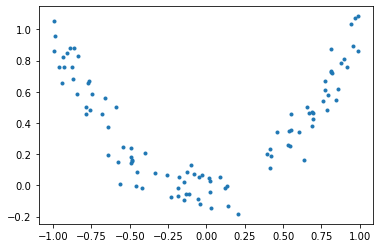

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.5003
Date:                Mon, 27 Dec 2021   Prob (F-statistic):              0.481
Time:                        15:01:20   Log-Likelihood:                -34.433
No. Observations:                 100   AIC:                             72.87
Df Residuals:                      98   BIC:                             78.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3847      0.035     11.151      0.0

In [7]:
##Section 2 - various Python tasks
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
n = 100
x = -1 + 2 * np.random.random(n)
epsilon = np.random.normal(0, 0.1, n)

y = x**2 + epsilon
plt.plot(x, y, ".")
plt.show()
##You can also fit a linear model using 
lX = np.stack((np.ones(n), x), axis=1)
lmodel = sm.OLS(y, lX)
lresult = lmodel.fit()
print(lresult.summary())

In [9]:
#We can fit a quadratic regression model using the below
# Quadratic regression model
qX = np.stack((np.ones(n), x, x**2), axis=1)
qmodel = sm.OLS(y, qX)
qresult = qmodel.fit()
print(qresult.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     520.8
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           1.33e-52
Time:                        15:02:26   Log-Likelihood:                 88.455
No. Observations:                 100   AIC:                            -170.9
Df Residuals:                      97   BIC:                            -163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0357      0.017     -2.156      0.0

In [8]:
##Create a dataframe using the below python code
data = pd.DataFrame({"Deaths": [109,102,102,98,85,95, 96, 98,123, 94,102],
                    "NicholasCage": [2,2,2,3,1,1,2,3,4,1,4]},
                   index = range(1999,2010))
data.index.name = "Year"
data.head()

,Deaths,NicholasCage
Year,,
1999,109,2
2000,102,2
2001,102,2
2002,98,3
2003,85,1


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


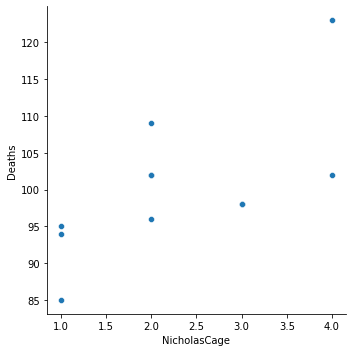

In [11]:
#Plot the above data
sns.relplot("NicholasCage", "Deaths", data=data)
plt.show()

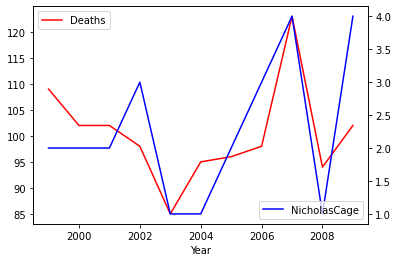

In [15]:
#Create a time series plot showing Deaths vs Nicholas Cage movies that year 
data["Deaths"].plot.line(color="red")
plt.legend(loc="upper left")
plt.twinx()
data["NicholasCage"].plot.line(color="blue")
plt.legend(loc="lower right")
plt.show()

In [17]:
#You can also fit a linear regression model for the data using 
import statsmodels.formula.api as smf
result = smf.ols(formula="Deaths ~ NicholasCage", data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     7.174
Date:                Mon, 27 Dec 2021   Prob (F-statistic):             0.0253
Time:                        15:08:15   Log-Likelihood:                -36.793
No. Observations:                  11   AIC:                             77.59
Df Residuals:                       9   BIC:                             78.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       87.1343      5.443     16.009   

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [18]:
#We can then use a t-test or f-test for the test (they are equivalent and give the same p-value as
#they refer to only one regression coefficient)
print(result.t_test("NicholasCage = 0"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             5.8209      2.173      2.678      0.025       0.905      10.737
